# Cleaning Modes With Rational Filters

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
import qnm
from gwpy.timeseries import TimeSeries
import copy
from scipy.special import logsumexp
import astropy.constants as c

In [36]:
data = np.loadtxt('./results/data_snrPoints=50_realisations=100_lowres.txt')

In [37]:
[med_snr, med_bayes, std_bayes] = data

Text(1.25, 1.25, 'Slope = 1.991 $\\pm$ 0.004')

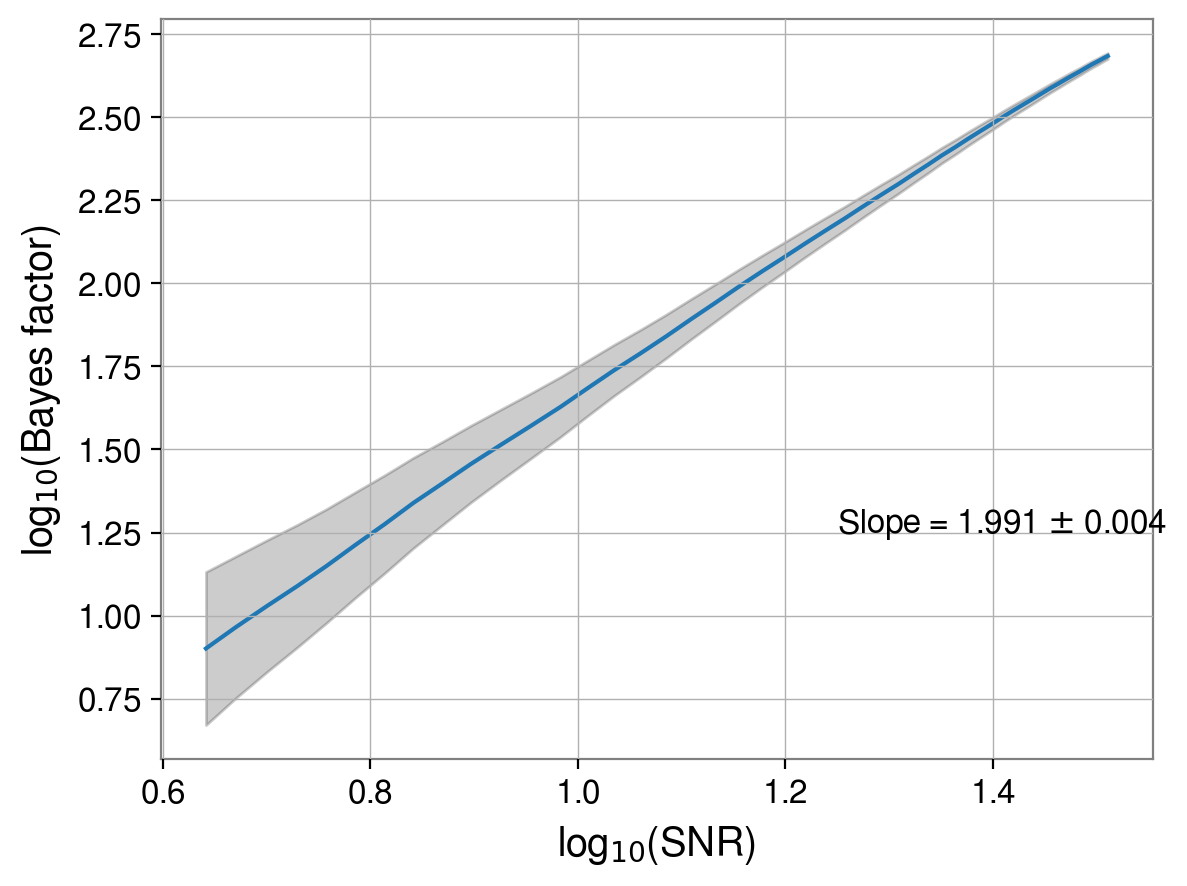

In [38]:
pl.plot(med_snr,med_bayes)
pl.fill_between(med_snr, 
                med_bayes-std_bayes, med_bayes+std_bayes,
               alpha = 0.2, color = 'k')
pl.xlabel("log$_{10}$(SNR)")
pl.ylabel("log$_{10}$(Bayes factor)")
pl.text(1.25, 1.25, 'Slope = 1.991 $\pm$ 0.004')

In [9]:
# Fix integrated version - make sure resolution is good enough 
# increase sample size and wide enough parameter space
# Randomise mass and spin

In [23]:
raw_data = np.loadtxt('./results/rawData_snrPoints=50_realisations=100_lowres.txt')

In [30]:
realisation_snr = np.reshape(raw_data[0], (100, 50))
realisation_bayes = np.reshape(raw_data[1], (100, 50))

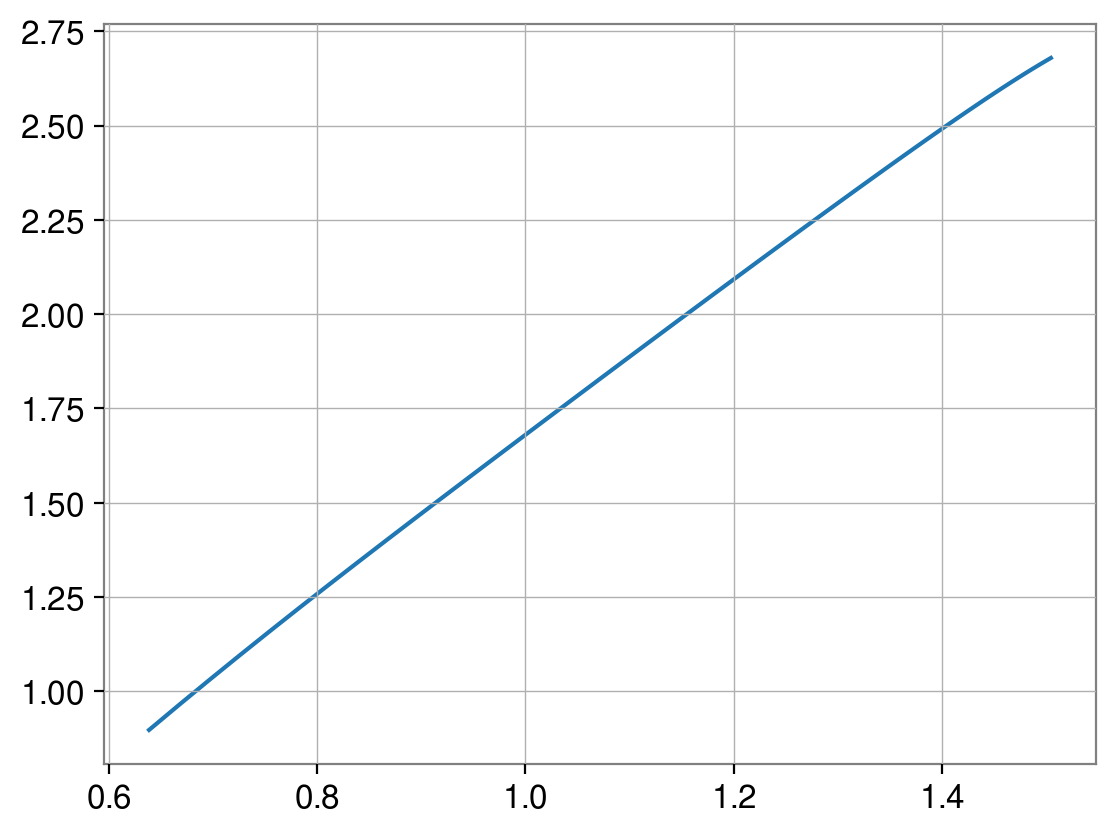

In [31]:
pl.plot(realisation_snr[0], realisation_bayes[0])

In [32]:
fits = np.array([np.polyfit(realisation_snr[i], realisation_bayes[i], deg=1)
                   for i in range(len(realisation_snr))])

In [33]:
np.median(fits[:,0])

2.044583436463502

In [34]:
np.std(fits[:,0])

0.060261477112553384

In [35]:
np.median(fits[:,1])

-0.37803900034549553

## Wrong modes

In [ ]:
raw_data = np.loadtxt('./results/rawData_snrPoints=50_realisations=30_lowres.txt')

In [ ]:
realisation_snr = np.reshape(raw_data[0], (100, 30))
realisation_bayes = np.reshape(raw_data[1], (100, 30))

In [ ]:
fits = np.array([np.polyfit(realisation_snr[i], realisation_bayes[i], deg=1)
                   for i in range(len(realisation_snr))])

In [ ]:
slope = np.median(fits[:,0])
slope_err = np.std(fits[:,0])

In [ ]:
data = np.loadtxt('./results/wrong_modes/220+221_data_snrPoints=50_realisations=100_lowres.txt')

In [ ]:
[med_snr, med_bayes, std_bayes] = data

In [ ]:
pl.plot(med_snr,med_bayes)
pl.fill_between(med_snr, 
                med_bayes-std_bayes, med_bayes+std_bayes,
               alpha = 0.2, color = 'k')
pl.xlabel("log$_{10}$(SNR)")
pl.ylabel("log$_{10}$(Bayes factor)")
pl.text(1.25, 1.25, 'Slope = %.2f $\pm$ %.2f' % (slope, slope_err))